In [1]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')
#matplotlibの日付変換に対する警告の非表示

In [3]:
start = '2019-07-01'
end = '2020-07-01'

df = data.DataReader('^N225', 'yahoo', start, end)

In [4]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-01,21758.339844,21559.169922,21566.269531,21729.970703,66900000,21729.970703
2019-07-02,21784.220703,21697.310547,21699.429688,21754.269531,54700000,21754.269531
2019-07-03,21708.720703,21566.650391,21684.070312,21638.160156,55000000,21638.160156
2019-07-04,21755.630859,21672.500000,21740.929688,21702.449219,37800000,21702.449219
2019-07-05,21746.380859,21647.730469,21703.609375,21746.380859,44800000,21746.380859
2019-07-08,21672.650391,21499.570312,21665.789062,21534.349609,51900000,21534.349609
2019-07-09,21687.289062,21508.220703,21598.150391,21565.150391,53900000,21565.150391
2019-07-10,21601.859375,21488.220703,21499.460938,21533.480469,58900000,21533.480469
2019-07-11,21649.929688,21532.570312,21547.189453,21643.529297,49600000,21643.529297


In [5]:
date=df.index
close=df['Adj Close']

In [7]:
span01=5
span02=25
span03=50

df['sma01'] = close.rolling(window=span01).mean()
df['sma02'] = close.rolling(window=span02).mean()
df['sma03'] = close.rolling(window=span03).mean()

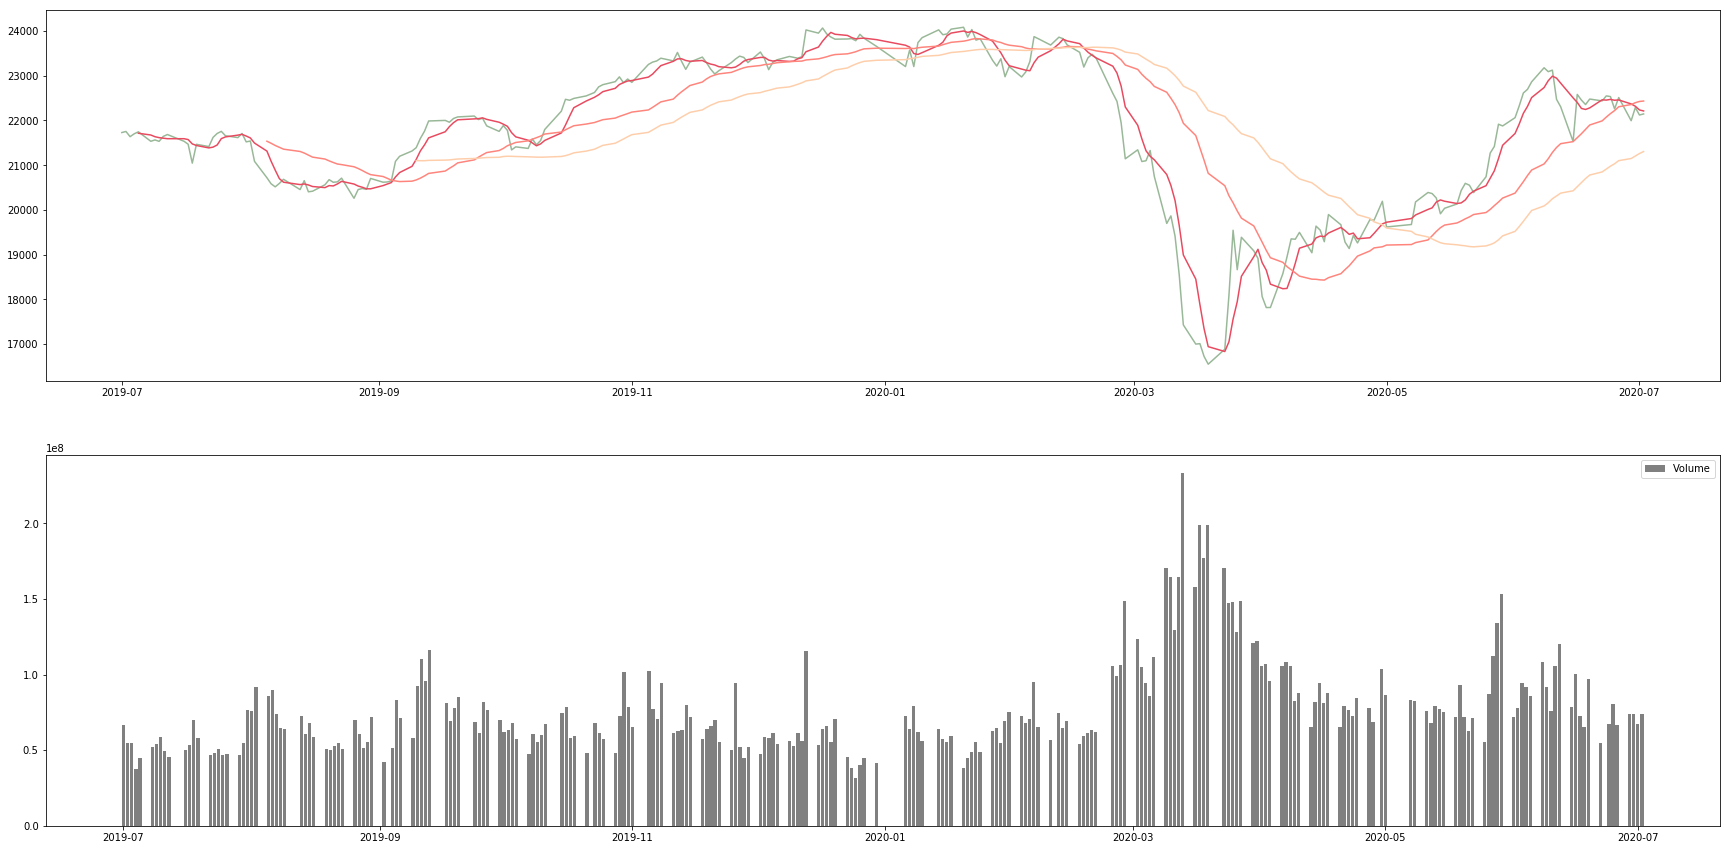

In [9]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)
#縦にグラフを分ける

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')

plt.subplot(2,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

In [10]:
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
#fastperiod=短期移動平均, slowperiod=長期移動平均, signalperiod=MACDシグナル

In [11]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2019-07-01,21758.339844,21559.169922,21566.269531,21729.970703,66900000,21729.970703,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,21784.220703,21697.310547,21699.429688,21754.269531,54700000,21754.269531,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,21708.720703,21566.650391,21684.070312,21638.160156,55000000,21638.160156,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-04,21755.630859,21672.500000,21740.929688,21702.449219,37800000,21702.449219,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-05,21746.380859,21647.730469,21703.609375,21746.380859,44800000,21746.380859,21714.246094,NaN,NaN,NaN,NaN,NaN


In [12]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2020-06-26,22589.140625,22408.269531,22424.369141,22512.080078,66600000,22512.080078,22458.501953,22306.225234,21102.236562,357.802813,463.676153,-105.873340
2020-06-29,22281.380859,21969.589844,22255.050781,21995.039062,73700000,21995.039062,22370.055859,22356.360781,21149.361133,298.284895,430.597901,-132.313007
2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000,22288.140625,22317.873828,22397.039609,21204.122148,271.636110,398.805543,-127.169433
2020-07-01,22360.310547,22039.560547,22338.300781,22121.730469,67400000,22121.730469,22235.355859,22425.139609,21260.752773,234.386981,365.921831,-131.534850
2020-07-02,22267.509766,22072.109375,22182.679688,22145.960938,73600000,22145.960938,22212.590234,22434.325625,21305.726797,204.465028,333.630470,-129.165442


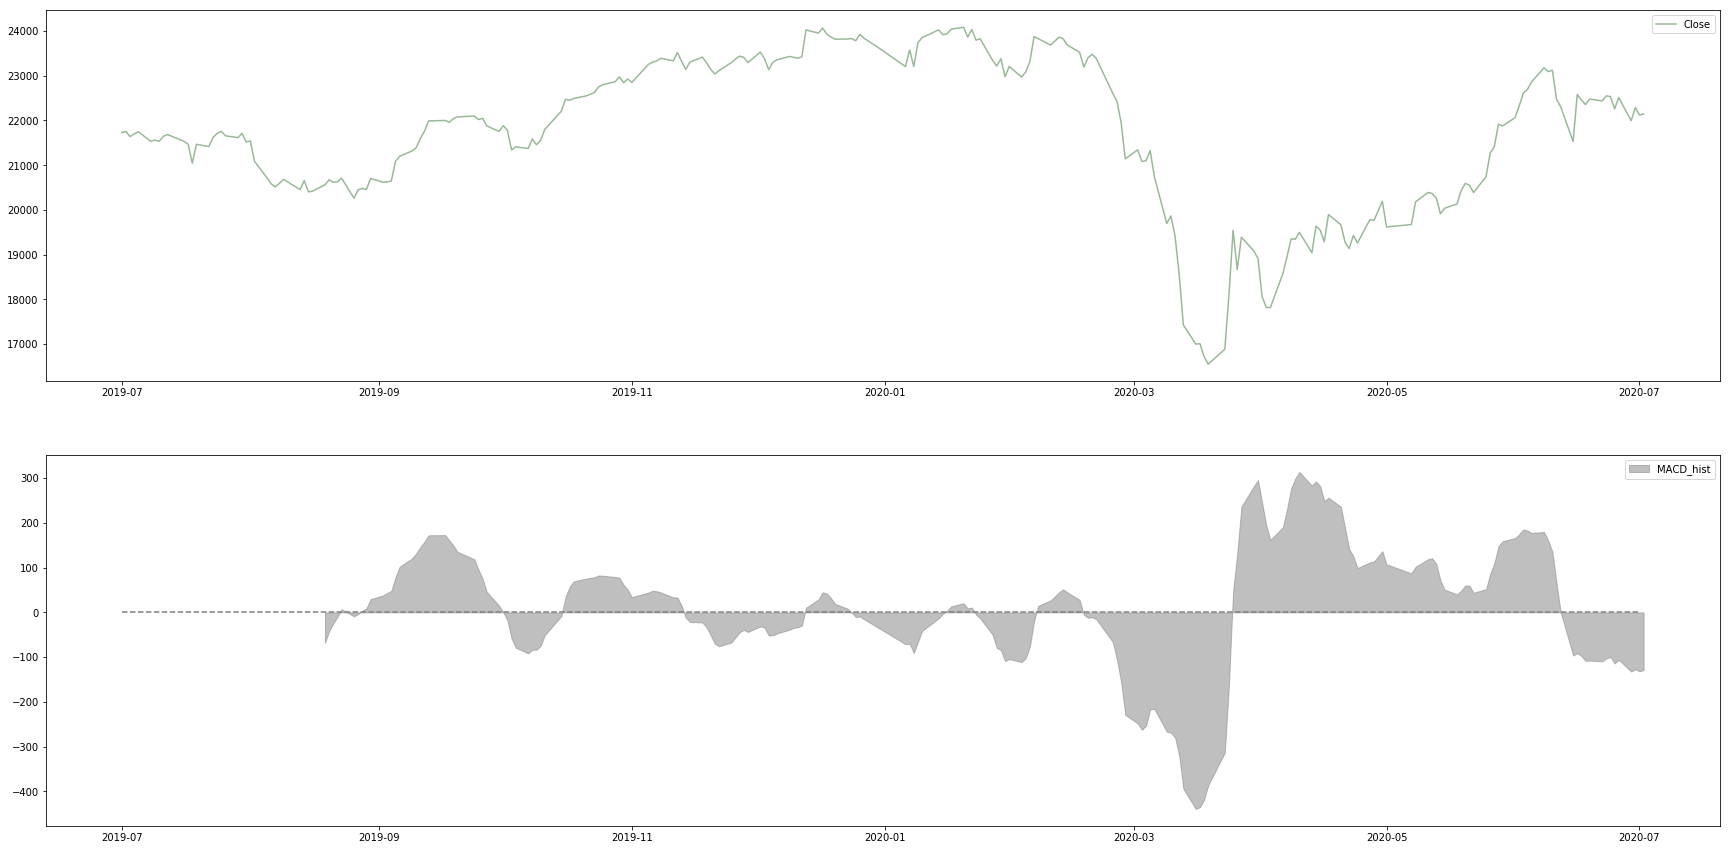

In [13]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.legend()

plt.subplot(2,1,2)
plt.fill_between(date, df['macdhist'], color='grey', alpha=0.5, label='MACD_hist')
#MACDヒストグラムを塗り潰し折れ線グラフ化
plt.hlines(0, start, end, 'gray', linestyles='dashed')
#y=0に水平線を描写
plt.legend()

In [14]:
df['RSI'] = ta.RSI(close, timeperiod=span02)
#timeperiod=RSIを作成する期間

In [15]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,,
2020-06-26,22589.140625,22408.269531,22424.369141,22512.080078,66600000,22512.080078,22458.501953,22306.225234,21102.236562,357.802813,463.676153,-105.873340,57.560379
2020-06-29,22281.380859,21969.589844,22255.050781,21995.039062,73700000,21995.039062,22370.055859,22356.360781,21149.361133,298.284895,430.597901,-132.313007,53.315995
2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000,22288.140625,22317.873828,22397.039609,21204.122148,271.636110,398.805543,-127.169433,55.263914
2020-07-01,22360.310547,22039.560547,22338.300781,22121.730469,67400000,22121.730469,22235.355859,22425.139609,21260.752773,234.386981,365.921831,-131.534850,53.933006
2020-07-02,22267.509766,22072.109375,22182.679688,22145.960938,73600000,22145.960938,22212.590234,22434.325625,21305.726797,204.465028,333.630470,-129.165442,54.100664


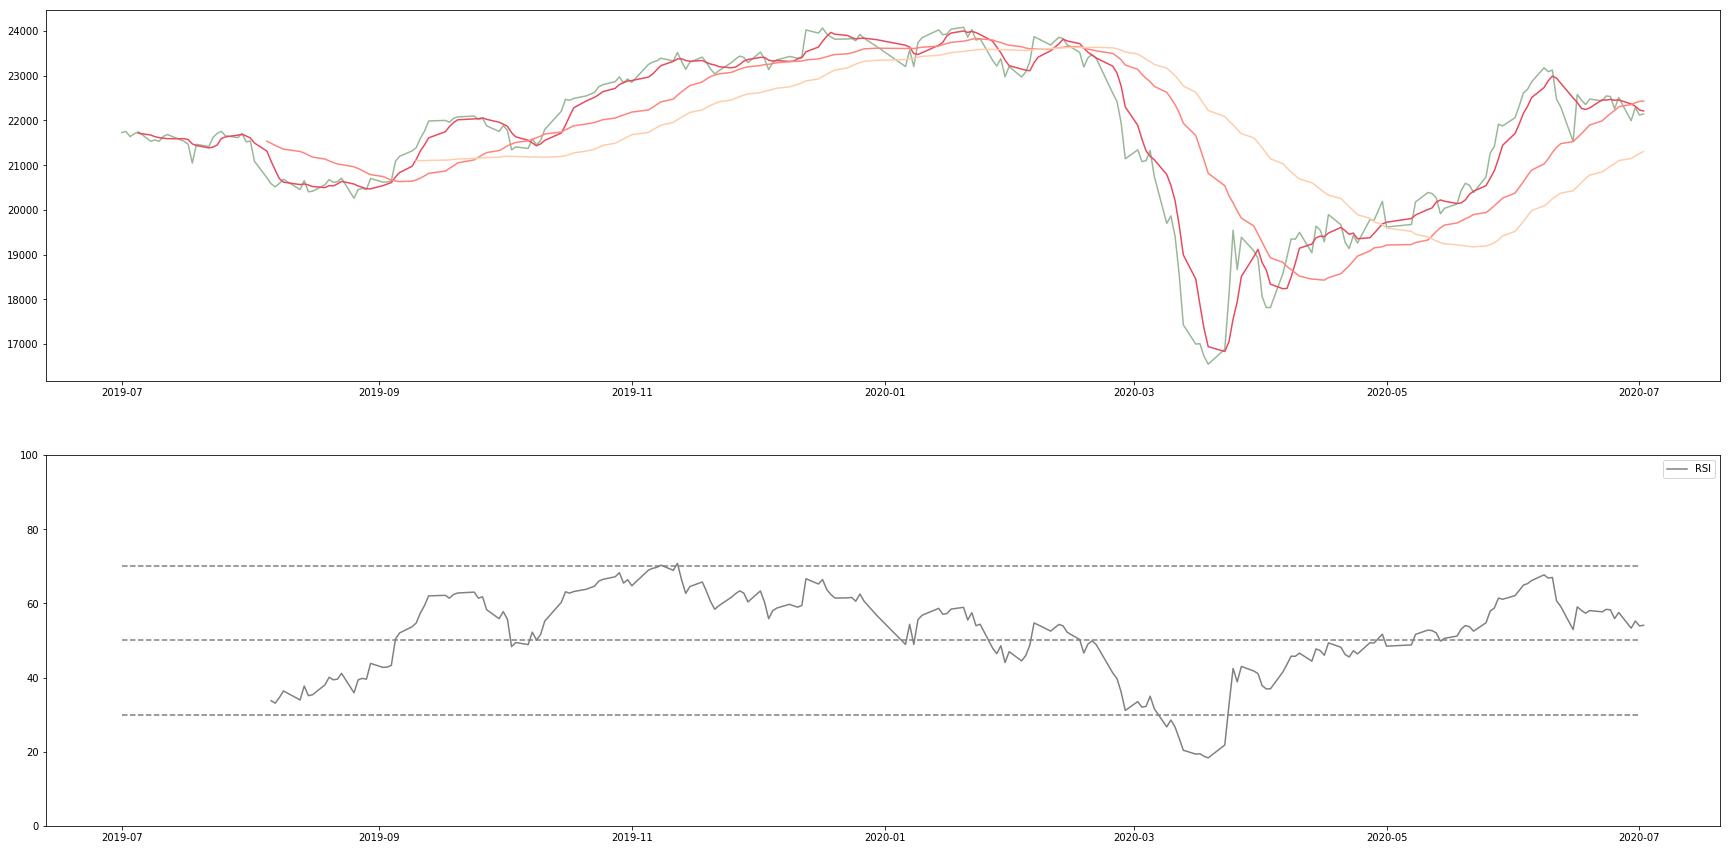

In [16]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')

plt.subplot(2,1,2)
plt.plot(date,df['RSI'],label='RSI',color='gray')
plt.ylim(0, 100)
plt.hlines([30,50,70],start,end,'gray',linestyles='dashed')
plt.legend()

savename='RSI.png'
plt.savefig(savename,dpi=300)

In [17]:
df["upper"], df["middle"], df["lower"] = ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)
#nbdevup=上のライン, nbdevdn=下のライン, matype=単純移動平均
#matype=1はし数移動平均, matype=2は加重移動平均

In [18]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,,
2020-06-26,22589.140625,22408.269531,22424.369141,22512.080078,66600000,22512.080078,22458.501953,22306.225234,21102.236562,357.802813,463.676153,-105.873340,57.560379,23454.238943,22306.225234,21158.211526
2020-06-29,22281.380859,21969.589844,22255.050781,21995.039062,73700000,21995.039062,22370.055859,22356.360781,21149.361133,298.284895,430.597901,-132.313007,53.315995,23321.613062,22356.360781,21391.108501
2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000,22288.140625,22317.873828,22397.039609,21204.122148,271.636110,398.805543,-127.169433,55.263914,23255.768474,22397.039609,21538.310745
2020-07-01,22360.310547,22039.560547,22338.300781,22121.730469,67400000,22121.730469,22235.355859,22425.139609,21260.752773,234.386981,365.921831,-131.534850,53.933006,23195.468324,22425.139609,21654.810895
2020-07-02,22267.509766,22072.109375,22182.679688,22145.960938,73600000,22145.960938,22212.590234,22434.325625,21305.726797,204.465028,333.630470,-129.165442,54.100664,23185.400982,22434.325625,21683.250268


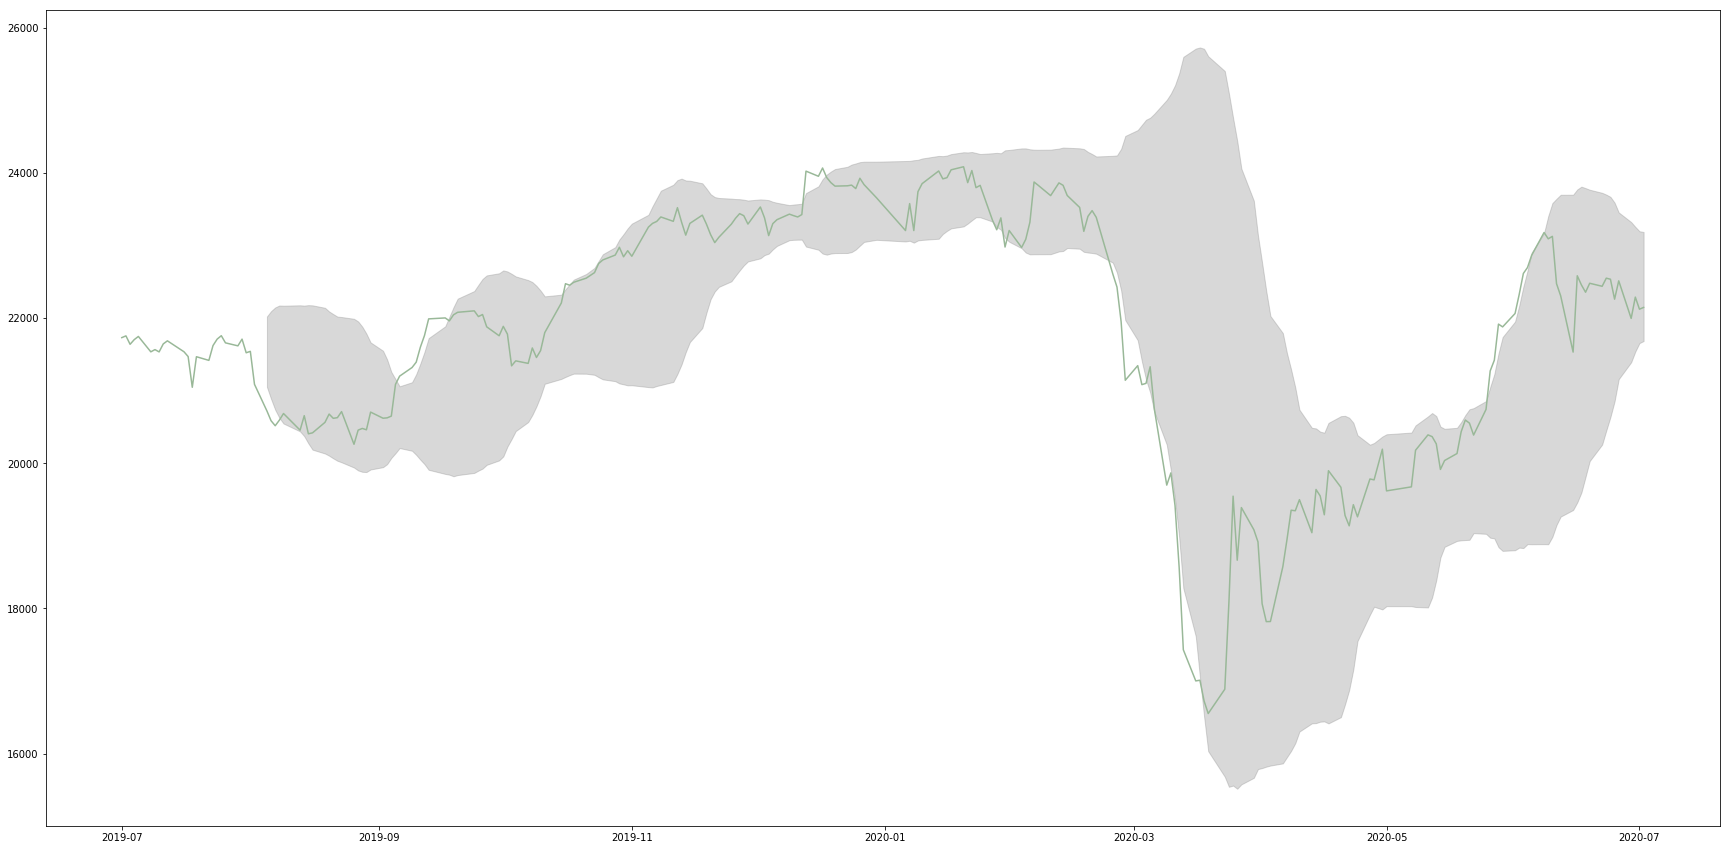

In [19]:
plt.figure(figsize=(30,15))

plt.plot(date,close,label='Close',color='#99b898')
plt.fill_between(date,df["upper"],df["lower"],color='gray',alpha=0.3)

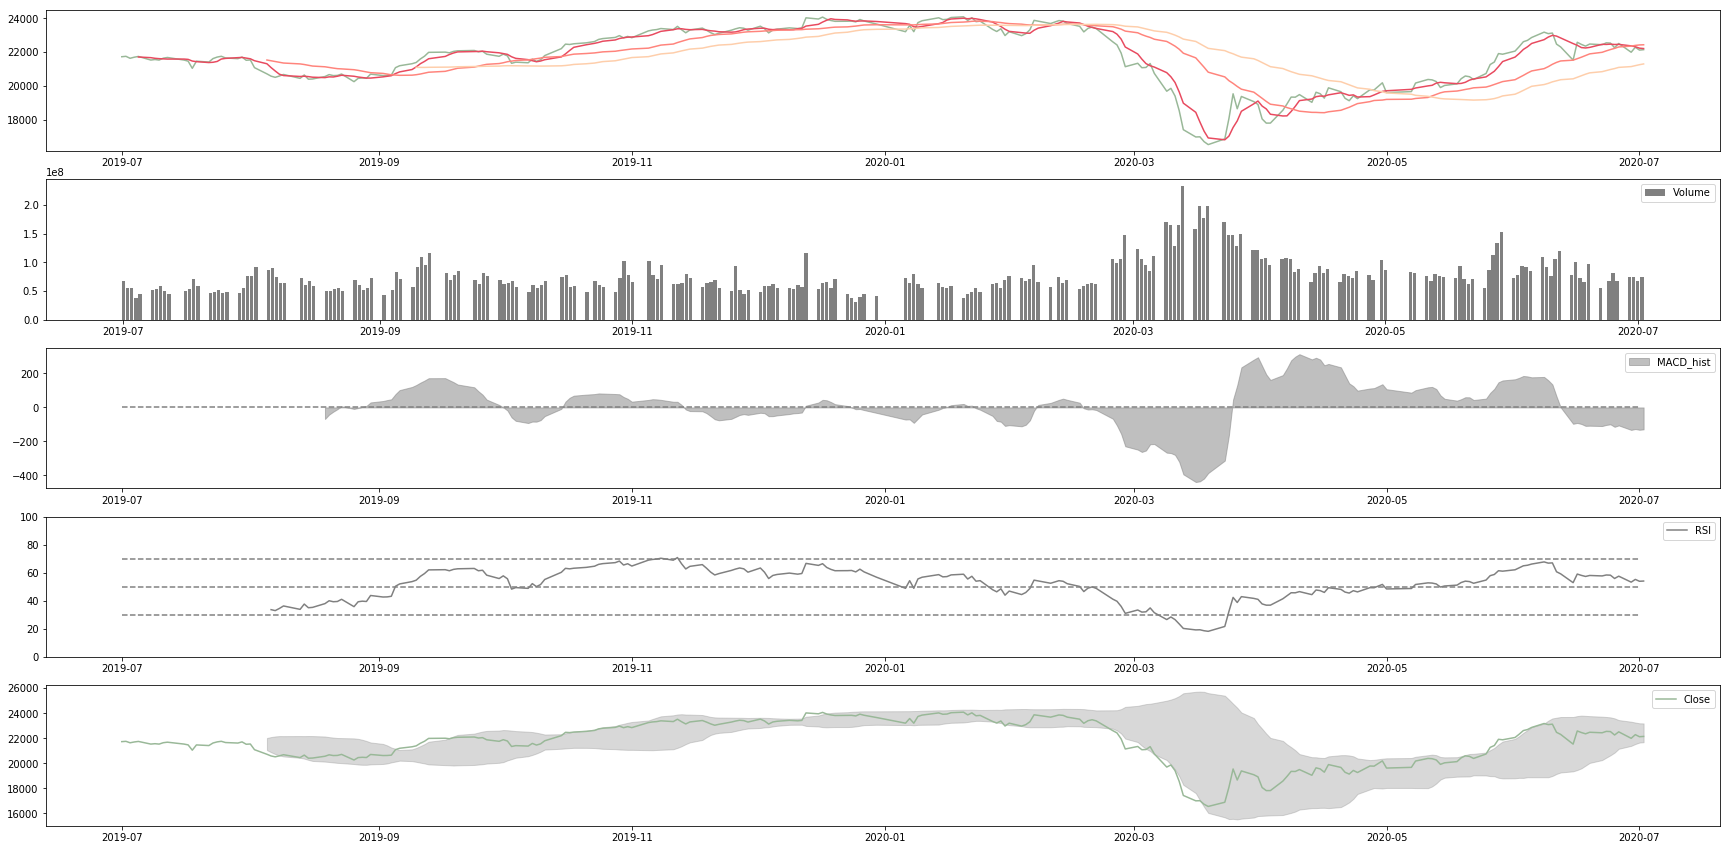

In [20]:
plt.figure(figsize=(30,15))
plt.subplot(5,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')

plt.subplot(5,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

plt.subplot(5,1,3)
plt.fill_between(date, df['macdhist'], color='grey', alpha=0.5, label='MACD_hist')
plt.hlines(0, start, end, 'gray', linestyles='dashed')
plt.legend()

plt.subplot(5,1,4)
plt.plot(date,df['RSI'],label='RSI',color='gray')
plt.ylim(0, 100)
plt.hlines([30,50,70],start,end,'gray',linestyles='dashed')
plt.legend()

plt.subplot(5,1,5)
plt.plot(date,close,label='Close',color='#99b898')
plt.fill_between(date,df["upper"],df["lower"],color='gray',alpha=0.3)
plt.legend()